In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nxviz.plots as nv
import nxviz as nv
from nxviz import annotate
from datetime import datetime

/opt/anaconda3/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


>**PREPROCESING**

In [4]:
ch_01 = pd.read_csv(r'/Users/hernanadasme/Projects/data_challenges/data_box/challen_01.csv')
ch_01.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
ch_01.head()

,Challenge H-ID,rec_Title_left,Source,Source year,Boxers challenging H-ID,rec_Title.1_left,Club Affiliation H-ID_left,rec_Title.2,Boxer Challenged H-ID_right,rec_Title_right,Club Affiliation H-ID_right,rec_Title.1_right
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",NaN,NaN,836,"Baeza, Florencio",NaN,NaN
1,972,Araya\nBolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",845.0,Juan Ferriere Boxing Club,780,"Bolli, Carlos",750.0,Pedro Martínez Hnos. Boxing Club
2,975,Valdes\nPérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",NaN,NaN,272,"Pérez, Amador",NaN,NaN
3,978,Ortiz\nAraya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",NaN,NaN,882,"Araya, Manuel",845.0,Juan Ferriere Boxing Club
4,985,Valdes\nGallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",NaN,NaN,827,"Gallardo, Pedro",NaN,NaN


In [6]:
ch_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Challenge H-ID               38 non-null     int64  
 1   rec_Title_left               38 non-null     object 
 2   Source                       38 non-null     object 
 3   Source year                  38 non-null     object 
 4   Boxers challenging H-ID      38 non-null     int64  
 5   rec_Title.1_left             38 non-null     object 
 6   Club Affiliation H-ID_left   5 non-null      float64
 7   rec_Title.2                  5 non-null      object 
 8   Boxer Challenged H-ID_right  38 non-null     int64  
 9   rec_Title_right              38 non-null     object 
 10  Club Affiliation H-ID_right  3 non-null      float64
 11  rec_Title.1_right            3 non-null      object 
dtypes: float64(2), int64(3), object(7)
memory usage: 3.7+ KB


In [10]:
ch_01.rename({'Boxers challenging H-ID': 'challenging_id'}, axis = 1, inplace=True)
ch_01.rename({'Boxer Challenged H-ID_right': 'challenged_id'}, axis = 1, inplace=True)
ch_01.rename({'rec_Title_right': 'challenged_name'}, axis = 1, inplace=True)
ch_01.rename({'rec_Title.1_left': 'challenging_name'}, axis = 1, inplace=True)
ch_01.rename({'rec_Title_left': 'challenge'}, axis = 1, inplace=True)
ch_01.rename({'Challenge H-ID': 'challenge_id'}, axis = 1, inplace=True)
#ch_01.head()

In [11]:
ch_01 = ch_01.astype({"challenging_id": str, "challenged_id": str})

In [12]:
ch_01['Source year'] =  pd.to_datetime(ch_01['Source year'])

In [13]:
ch_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   challenge_id                 38 non-null     int64         
 1   challenge                    38 non-null     object        
 2   Source                       38 non-null     object        
 3   Source year                  38 non-null     datetime64[ns]
 4   challenging_id               38 non-null     object        
 5   challenging_name             38 non-null     object        
 6   Club Affiliation H-ID_left   5 non-null      float64       
 7   rec_Title.2                  5 non-null      object        
 8   challenged_id                38 non-null     object        
 9   challenged_name              38 non-null     object        
 10  Club Affiliation H-ID_right  3 non-null      float64       
 11  rec_Title.1_right            3 non-null      ob

>**ADDING NODES AND ADDING EDGES**

In [14]:
D = nx.DiGraph()
D.add_nodes_from(ch_01['challenging_id'], bipartite = 'challenger')
D.add_nodes_from(ch_01['challenged_id'], bipartite = 'challenged')

In [15]:
for r, d in ch_01.iterrows():
    D.add_edge(d['challenging_id'], d['challenged_id'], date = d['Source year'])

In [16]:
D.edges(data=True)

OutEdgeDataView([('865', '836', {'date': Timestamp('1928-03-02 00:00:00')}), ('882', '780', {'date': Timestamp('1928-04-05 00:00:00')}), ('833', '272', {'date': Timestamp('1928-04-08 00:00:00')}), ('833', '827', {'date': Timestamp('1928-04-29 00:00:00')}), ('976', '882', {'date': Timestamp('1928-04-08 00:00:00')}), ('189', '987', {'date': Timestamp('1924-02-01 00:00:00')}), ('302', '303', {'date': Timestamp('1924-03-07 00:00:00')}), ('891', '573', {'date': Timestamp('1924-02-01 00:00:00')}), ('158', '1001', {'date': Timestamp('1924-03-07 00:00:00')}), ('1003', '321', {'date': Timestamp('1924-03-07 00:00:00')}), ('647', '423', {'date': Timestamp('1924-03-07 00:00:00')}), ('647', '1006', {'date': Timestamp('1924-03-07 00:00:00')}), ('647', '1008', {'date': Timestamp('1924-03-07 00:00:00')}), ('332', '1010', {'date': Timestamp('1924-03-14 00:00:00')}), ('332', '1012', {'date': Timestamp('1924-03-14 00:00:00')}), ('502', '1014', {'date': Timestamp('1924-03-14 00:00:00')}), ('143', '572', {

In [17]:
D.nodes(data=True)

NodeDataView({'865': {'bipartite': 'challenger'}, '882': {'bipartite': 'challenged'}, '833': {'bipartite': 'challenger'}, '976': {'bipartite': 'challenger'}, '189': {'bipartite': 'challenger'}, '302': {'bipartite': 'challenger'}, '891': {'bipartite': 'challenger'}, '158': {'bipartite': 'challenger'}, '1003': {'bipartite': 'challenger'}, '647': {'bipartite': 'challenger'}, '332': {'bipartite': 'challenger'}, '502': {'bipartite': 'challenger'}, '143': {'bipartite': 'challenger'}, '77': {'bipartite': 'challenger'}, '639': {'bipartite': 'challenger'}, '732': {'bipartite': 'challenger'}, '163': {'bipartite': 'challenger'}, '162': {'bipartite': 'challenger'}, '175': {'bipartite': 'challenger'}, '174': {'bipartite': 'challenger'}, '177': {'bipartite': 'challenger'}, '178': {'bipartite': 'challenger'}, '185': {'bipartite': 'challenger'}, '933': {'bipartite': 'challenger'}, '935': {'bipartite': 'challenger'}, '937': {'bipartite': 'challenger'}, '939': {'bipartite': 'challenger'}, '836': {'bipar

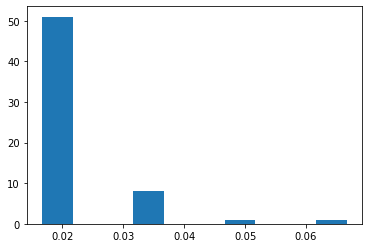

In [18]:
# Plot the degree distribution 
plt.hist(list(nx.degree_centrality(D).values()))
plt.show()

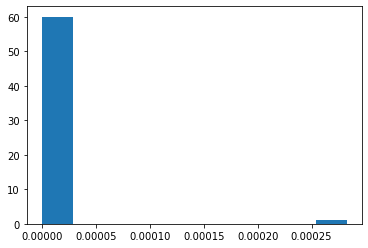

In [19]:
# Plot the degree distribution 
plt.hist(list(nx.betweenness_centrality(D).values()))
plt.show()

In [20]:
#instantiation an empty list
nodelist=[]
#iterate over the nodes n and their dictionary metadata D
for n,d in D.nodes(data=True):
    #for every node we create a new record dictionary
    node_data = dict()
    #we use node to uniquely identify by its ID: make sure not to overlap with the metadata keys
    node_data['node'] = n
    #we update the record dictionary with the metadata dictionary, using the node_data dot update(other_dict) method, 
    #which will take one dictionary and add in key-value pairs in the other dictionary
    node_data.update(d)
    nodelist.append(node_data)
#nodelist has been transform into a list of dictionary

In [21]:
df_nodes = pd.DataFrame(nodelist)

In [22]:
df_nodes

,node,bipartite
0,865,challenger
1,882,challenged
2,833,challenger
3,976,challenger
4,189,challenger
...,...,...
56,1043,challenged
57,934,challenged
58,936,challenged
59,1048,challenged


In [23]:
challengers = list(ch_01.challenging_id.unique())
len(challengers)

27

In [24]:
challengers

['865',
 '882',
 '833',
 '976',
 '189',
 '302',
 '891',
 '158',
 '1003',
 '647',
 '332',
 '502',
 '143',
 '77',
 '639',
 '732',
 '163',
 '162',
 '175',
 '174',
 '177',
 '178',
 '185',
 '933',
 '935',
 '937',
 '939']

In [25]:
challenged = list(ch_01.challenged_id.unique())
len(challenged)

35

In [26]:
challenged


['836',
 '780',
 '272',
 '882',
 '827',
 '987',
 '303',
 '573',
 '1001',
 '321',
 '423',
 '1006',
 '1008',
 '1010',
 '1012',
 '1014',
 '572',
 '146',
 '1021',
 '735',
 '1024',
 '1026',
 '223',
 '733',
 '1031',
 '1035',
 '98',
 '1038',
 '1040',
 '126',
 '1043',
 '934',
 '936',
 '1048',
 '938']

In [28]:
# 1. Create the graph
g = nx.from_pandas_edgelist(ch_01, source='challenging_id', target='challenged_id') 

In [51]:
# 2. Create a layout for our nodes 
pos = nx.spring_layout(g, k =0.3, seed=150)
pos["639"] = (0.005,0.005)

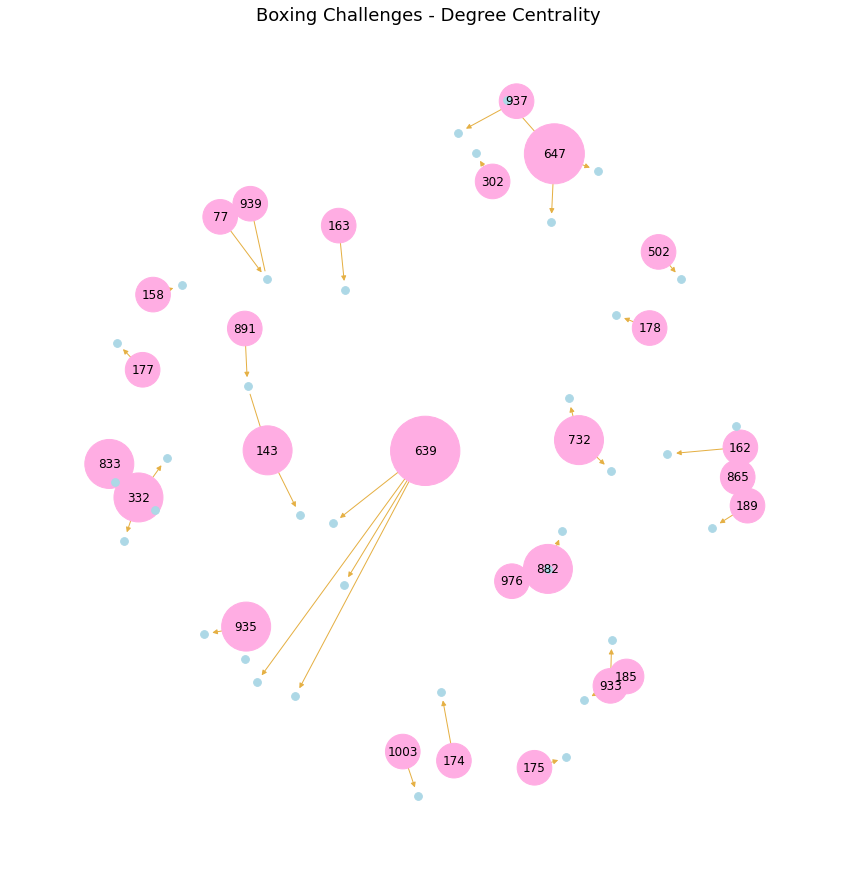

In [55]:
# 3. Draw the parts we want
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw_networkx_edges(g, pos, edge_color='#E5B044',arrows=True, arrowsize=10)

challengers = [node for node in g.nodes() if node in ch_01.challenging_id.unique()]
challenged = [node for node in g.nodes() if node in ch_01.challenged_id.unique()]
size = [g.degree(node) * 1200 for node in g.nodes() if node in ch_01.challenging_id.unique()]
nx.draw_networkx_nodes(g, pos, nodelist = challengers, node_size=size, node_color ='#FFADE3')
challengers_dict = dict(zip(challengers, challengers))
nx.draw_networkx_labels(g, pos, labels=challengers_dict)
challenged_dict = dict(zip(challenged, challenged))
#nx.draw_networkx_labels(g, pos, labels=challenged_dict)

challenged = [node for node in g.nodes() if node in ch_01.challenged_id.unique()]
nx.draw_networkx_nodes(g, pos, nodelist=challenged, node_size=60, node_color ='lightblue')
#Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.title('Boxing Challenges - Degree Centrality', fontsize=18)
fig5 = plt.gcf()
fig5.savefig("/Users/hernanadasme/Documents/data_challenges/graph_10.jpg", dpi=600) 
plt.show()